In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X=data.iloc[:,[3,4]].values
len(X)

200

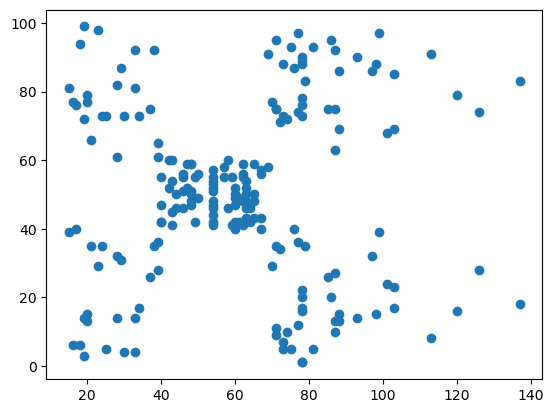

In [8]:
plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"])
plt.show()

$K-Means$

In [9]:
# We need to decide the number of clusters
# Elbow method
# Within sum of squares
# we randomly gives 10 clusters, for each cluster will calculate 
# within sum of squares

**Elbow Method**

- Sum of squares with in the clusters (SSWC)

    - Variance in side the clusters
    
    - Variance in side the clusters should be low
    
- Sum of squares between the clusters (SSBC)

    - Variance between the cluster
    
    - Variance between the cluster should be high
    
    - Then only we can sure that clusters apart from each other
    
Example: 9000  5000  1000  900  850
    
         1    2    3   4   5
          

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1

KMeans(n_clusters=1, random_state=1234)

In [12]:
kmeans_1.fit(X)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=1234)

$Intertia$:

- measures how well a dataset was clustered by K-Means. 

- It is calculated by measuring the distance between each data point and its centroid, squaring this distance, 

- and summing these squares across one cluster



In [14]:
kmeans_1.inertia_

269981.28

In [15]:
kmeans_1.cluster_centers_

array([[60.56, 50.2 ]])

In [16]:
data["Annual Income (k$)"].mean(), data["Spending Score (1-100)"].mean()

(60.56, 50.2)

In [30]:
import warnings

warnings.filterwarnings('ignore')

wss=[]
for i in range(1,10):    
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=1234)
    kmeans.fit(X)
    wss.append(round(kmeans.inertia_,2))

In [31]:
wss

[269981.28,
 181363.6,
 106348.37,
 73679.79,
 44448.46,
 37233.81,
 30241.34,
 25062.43,
 21830.04]

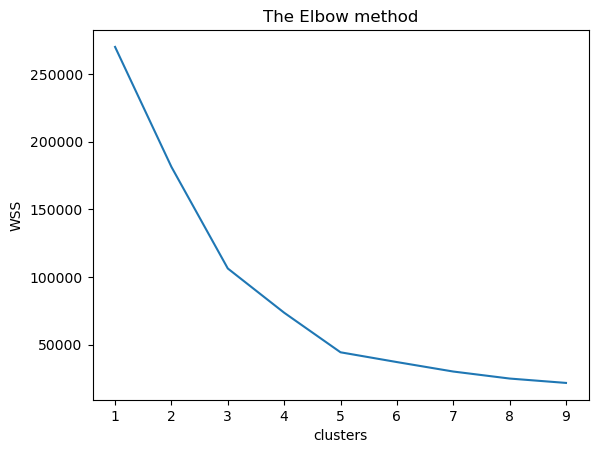

In [32]:
plt.plot(range(1,10),wss)
plt.title("The Elbow method")
plt.xlabel("clusters")
plt.ylabel("WSS")
plt.show()

In [33]:
len(X)
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [65]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_clusters=kmeans.fit_predict(X)
y_clusters

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [35]:
data["Cluster_group"]=y_clusters

In [36]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [37]:
data["Cluster_group"].value_counts()

Cluster_group
4    81
1    39
3    35
0    23
2    22
Name: count, dtype: int64

In [44]:
data[data["Cluster_group"]==0].columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

In [45]:
cols=['Annual Income (k$)','Spending Score (1-100)']
data[data["Cluster_group"]==0][cols]

,Annual Income (k$),Spending Score (1-100)
0,15,39
2,16,6
4,17,40
6,18,6
8,19,3
10,19,14
12,20,15
14,20,13
16,21,35
18,23,29


In [46]:
data[data['Cluster_group']==0].iloc[:,[3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
2,16,6
4,17,40
6,18,6
8,19,3
10,19,14
12,20,15
14,20,13
16,21,35
18,23,29


In [52]:
cs_1=data[data['Cluster_group']==0].iloc[:,[3,4]]
cs_2=data[data['Cluster_group']==1].iloc[:,[3,4]]
cs_3=data[data['Cluster_group']==2].iloc[:,[3,4]]
cs_4=data[data['Cluster_group']==3].iloc[:,[3,4]]
cs_5=data[data['Cluster_group']==4].iloc[:,[3,4]]
d1={"Cluster-1":cs_1.mean(),
    "Cluster-2":cs_2.mean(),
    "Cluster-3":cs_3.mean(),
    "Cluster-4":cs_4.mean(),
    "Cluster-5":cs_5.mean()}
pd.DataFrame(d1)

,Cluster-1,Cluster-2,Cluster-3,Cluster-4,Cluster-5
Annual Income (k$),26.304348,86.538462,25.727273,88.200000,55.296296
Spending Score (1-100),20.913043,82.128205,79.363636,17.114286,49.518519


In [53]:
# d1=pd.DataFrame(dict(cs_1.mean()),index=['Cluster-1'])
# d2=pd.DataFrame(dict(cs_2.mean()),index=['Cluster-2'])
# d3=pd.DataFrame(dict(cs_3.mean()),index=['Cluster-3'])
# d4=pd.DataFrame(dict(cs_4.mean()),index=['Cluster-4'])
# d5=pd.DataFrame(dict(cs_5.mean()),index=['Cluster-5'])
# d1.append(d2).append(d3).append(d4).append(d5)

In [56]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [69]:
X[y_clusters==0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

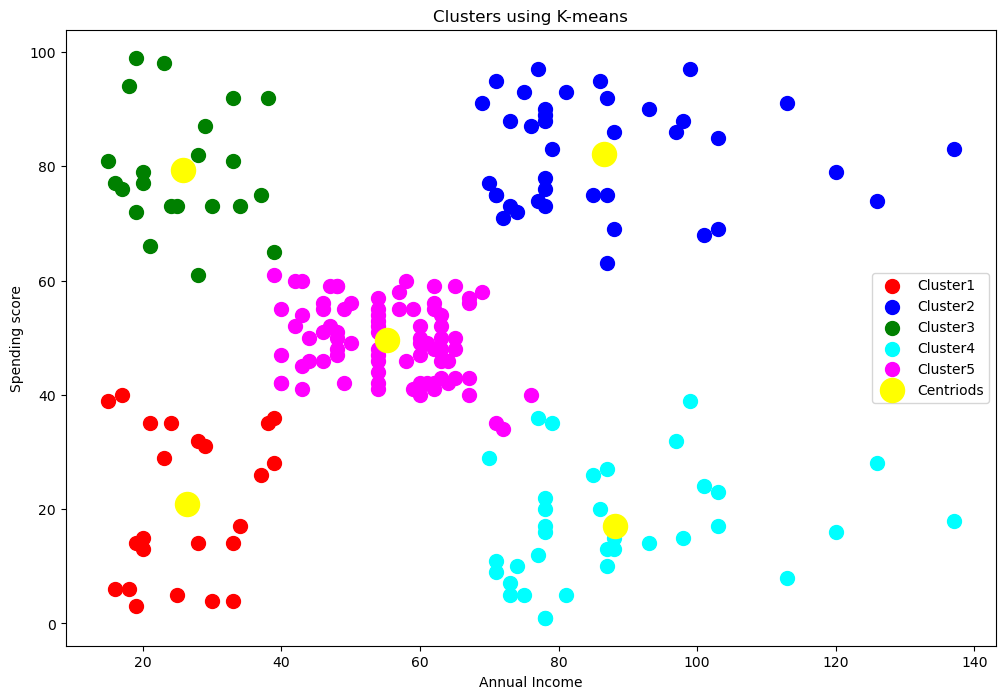

In [54]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=100,c='magenta',label="Cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using K-means")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()
